In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
x_train = np.linspace(0, 1, 20)
x_test = np.linspace(0, 1, 40)
y_train = 0.1 * x_train + np.sin(x_train * 2)
y_test = 0.1 * x_test + np.sin(x_test * 2)
print(x_train)
print(x_test)
print('\n')
print(y_train)
print(y_test)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.         0.02564103 0.05128205 0.07692308 0.1025641  0.12820513
 0.15384615 0.17948718 0.20512821 0.23076923 0.25641026 0.28205128
 0.30769231 0.33333333 0.35897436 0.38461538 0.41025641 0.43589744
 0.46153846 0.48717949 0.51282051 0.53846154 0.56410256 0.58974359
 0.61538462 0.64102564 0.66666667 0.69230769 0.71794872 0.74358974
 0.76923077 0.79487179 0.82051282 0.84615385 0.87179487 0.8974359
 0.92307692 0.94871795 0.97435897 1.        ]


[0.         0.11033203 0.21950094 0.32635648 0.429774   0.52866694
 0.6219988  0.70879465 0.78815192 0.85925037 0.9213612  0.9738551
 1.01620923 1.04801297 1.06897253 1.07891415 1.07778603 1.06565892
 1.04272534 1.00929743]
[0.         0.05382368 0.10751258 0.16093229 0.21394909 0.26643032
 0.31824475 0.36926287 0.41935729 0

In [134]:
class MLP:
    """
    1 Hidden Layer MLP Class
    
    Input:  x - 1 dimensional train data
            y - 1 dimensional true values
            neurons - number of neurons in layer
            activation - sigmoid or tanh activation function (tanh, sigmoid) (default: sigmoid)
            lr - learning rate (default: 0.1)
            epochs - number of iterations (default: 1000)
    """
    def __init__(self, x, y, neurons, activation, lr=0.1, epochs=1000):
        self.x = x
        self.y = y
        self.neurons = neurons
        self.w1 = self.initialization(self.neurons)
        self.w2 = self.initialization(self.neurons)
        self.b1 = self.initialization(self.neurons)
        self.b2 = self.initialization(1)
        self.a1 = np.zeros(self.neurons)
        self.a2 = 0
        self.activation = self.selected_activation(activation)
        self.lr = lr
        self.epochs = epochs
        self.pred_y = []
    
    def initialization(self, size):
        return np.random.rand(size)
            
    def selected_activation(self, activation):
        activation_func = lambda activation: 'tanh' if activation == 'tanh' else 'sigmoid'
        return activation_func(activation)
    
    def activation_function(self, z):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        else:
            return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
    def forward_propagation(self, x, test=None):
        output_layer = 0
        for i in range(self.neurons):
            z = self.w1[i] * x + self.b1[i]
            self.a1[i] = self.activation_function(z)
            output_layer += self.w2[i] * self.a1[i]
        if test != None:
            self.pred_y.append(output_layer + self.b2)
        else:
            self.a2 = output_layer + self.b2
    
    def error_function(self, y_true, output_layer):
        return y_true - output_layer
    
    def activation_derivative(self, fi):
        if self.activation == 'sigmoid':
            return fi * (1 - fi)
        else:
            return 1 - fi**2
    
    def delta_output_layer(self, e):
        return 1 * e
    
    def delta_hidden_layer(self, fi, e, w):
        return self.activation_derivative(fi) * self.delta_output_layer(e) * w
    
    def params_ouput_update(self, e):
        for i in range(len(self.w2)):
            self.w2[i] = self.w2[i] + self.lr * self.delta_output_layer(e) * self.a1[i]
        self.b2 = self.b2 + self.lr * self.delta_output_layer(e)
            
    def params_hidden_update(self, e, x):
        for i in range(len(self.w1)):
            delta = self.delta_hidden_layer(self.a1[i], e, self.w1[i])
            self.w1[i] = self.w1[i] + self.lr * delta * x
            self.b1[i] = self.b1[i] + self.lr * delta
            
    def train(self):
        for j in range(self.epochs):
            for i in range(len(self.x)):
                self.forward_propagation(self.x[i])
                e = self.error_function(self.y[i], self.a2)
                self.params_ouput_update(e)
                self.params_hidden_update(e, self.x[i])
            if j%500 == 0:
                print(f'Epoch: {j} Error: {e}')

    def test(self, x_test):
        for x in x_test:
            self.forward_propagation(x, test='test')
    
    def visualization(self, x, y):
        plt.plot(x, y, 'r+', x, self.pred_y, 'b.')

In [142]:
model = MLP(x_train, y_train, 5, 'sigmoid', lr=0.1, epochs=10000)
model.train()
model.test(x_test)

Epoch: 0 Error: [-0.05021957]
Epoch: 500 Error: [-0.06884383]
Epoch: 1000 Error: [-0.06226645]
Epoch: 1500 Error: [-0.06221188]
Epoch: 2000 Error: [-0.06233713]
Epoch: 2500 Error: [-0.06190719]
Epoch: 3000 Error: [-0.06099224]
Epoch: 3500 Error: [-0.05983377]
Epoch: 4000 Error: [-0.05866554]
Epoch: 4500 Error: [-0.05766021]
Epoch: 5000 Error: [-0.05688906]
Epoch: 5500 Error: [-0.05634059]
Epoch: 6000 Error: [-0.055968]
Epoch: 6500 Error: [-0.05572149]
Epoch: 7000 Error: [-0.05556047]
Epoch: 7500 Error: [-0.05545532]
Epoch: 8000 Error: [-0.05538561]
Epoch: 8500 Error: [-0.0553375]
Epoch: 9000 Error: [-0.05530172]
Epoch: 9500 Error: [-0.05527192]


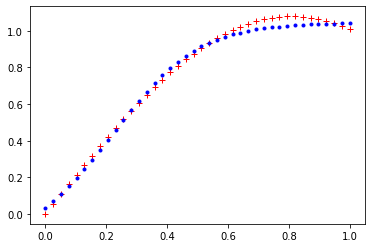

In [143]:
model.visualization(x_test, y_test)